1. See the plot of the fit [below](#Fit-plot) (Note: plots are reversed in the
    vertical direction to match the figure).

2. Estimation of parameters

    1. [$g (m\cdot s^{-2})$](#Approximation-of-$g$)

    2. [Initial height $(m)$](#Initial-height)
    
    3. [$e$](#$e$)

3. [Time to stop](#Time-to-stop)

In [3]:
using PyPlot

In [8]:
include("givens.jl")

givens! (generic function with 1 method)

In [4]:
data = readdlm("super_ypos.txt", ' ');

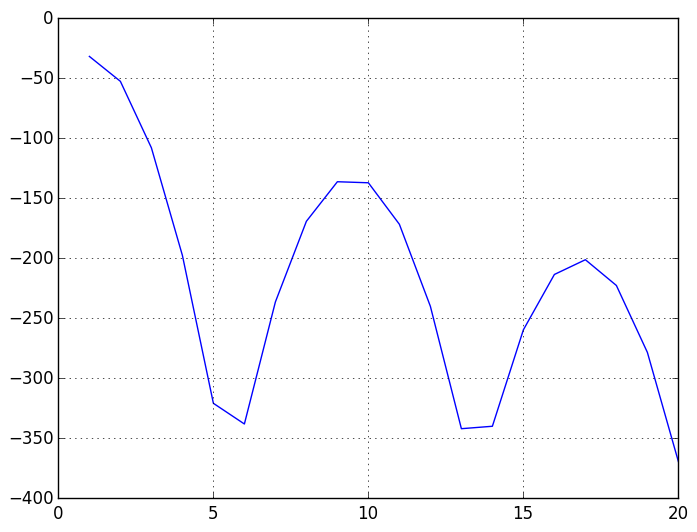

In [15]:
plot(data[:, 1], -data[:, 2])
grid()

In [11]:
function fit_quad(f, y)
    len = length(f)
    @assert len == length(y)
    A = Matrix{eltype(f)}(len, 3)
    for i in 1:len
        ef = f[i]
        A[i, 1] = 1
        A[i, 2] = ef
        A[i, 3] = ef^2
    end
    Q, R = givens!(A)
    y′ = Q'*y
    R[1:3, :] \ y′[1:3]
end

fit_quad (generic function with 1 method)

In [20]:
function plot_quad(f, y, fit)
    plot(f, -y, "b")
    xs = linspace(f[1] - 1, f[end] + 1, 1000)
    plot(xs, [-fit[1] - fit[2] * x - fit[3] * x^2 for x in xs], "r")
end

plot_quad (generic function with 1 method)

In [16]:
fit1 = fit_quad(data[1:5, 1], data[1:5, 2]);
fit2 = fit_quad(data[6:13, 1], data[6:13, 2]);
fit3 = fit_quad(data[14:20, 1], data[14:20, 2]);

#### Fit plot

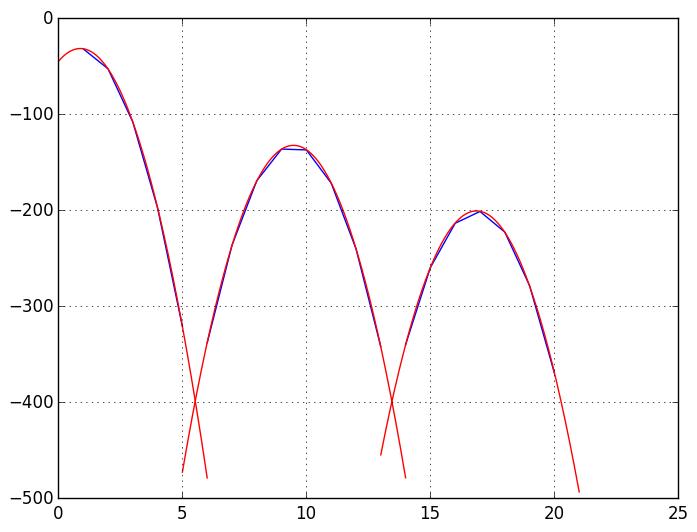

In [22]:
plot_quad(data[1:5, 1], data[1:5, 2], fit1)
plot_quad(data[6:13, 1], data[6:13, 2], fit2)
plot_quad(data[14:20, 1], data[14:20, 2], fit3)
grid()

#### Approximation of $g$

In [24]:
α_avg = (fit1[3] + fit2[3] + fit3[3]) / 3
δt = 7 / 120
g = 2 * α_avg / δt^2 / 43.5 * 42.5e-3

9.784166982055694

In [25]:
function find_bottom(fit1, fit2)
    δ_fit = fit1 - fit2
    c′ = 2 * δ_fit[1] / δ_fit[2]
    a′ = 2 * δ_fit[3] / δ_fit[2]
    x = -c′ / (√(1 - a′ * c′) + 1)
    fit1[1] + fit1[2] * x + fit1[3] * x^2
end

find_bottom (generic function with 1 method)

In [30]:
# The height of the two crossings
b1 = find_bottom(fit1, fit2)
b2 = find_bottom(fit2, fit3)
bottom_avg = (b1 + b2) / 2

398.69576234201094

#### Initial height

In [31]:
h0 = (bottom_avg - data[1, 2]) / 43.5 * 42.5e-3

0.358612597143413

In [37]:
# Energy (in arbitrary unit)

E1 = bottom_avg + (fit1[2]^2 - 4 * fit1[1] * fit1[3]) / 4 / fit1[3]
E2 = bottom_avg + (fit2[2]^2 - 4 * fit2[1] * fit2[3]) / 4 / fit2[3]
E3 = bottom_avg + (fit3[2]^2 - 4 * fit3[1] * fit3[3]) / 4 / fit3[3]

198.18717139589674

#### $e$

In [41]:
e1 = sqrt(E2 / E1)
e2 = sqrt(E3 / E2)
e_avg = (e1 + e2) / 2

0.857040925593946

#### Time to stop

In [43]:
sqrt(h0 / 2 / g) * (1 + e_avg) / (1 - e_avg)

1.758513035276272